In [1]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import os

## Loading class module

In [2]:
%run ../stochastic_fractal_m.py

In [3]:
alphap = 2  # any real positive value larger than 0.5, but anaylytical plot exists only for alpha=1,2,3
probp = 0.75 # any value between 0 and 1

ensemble_sizep = 1000
min_iterationp = 100_000
bin_sizep = 0.0001

In [4]:
expon = 2 * alphap - 1

## Defining directory

In [5]:
dir_data = "../data/alpha{}/".format(alphap)
dir_fig  ="../figures/alpha{}/".format(alphap)


## While testing
dir_data = "../data/temp/alpha{}/".format(alphap)
dir_fig  ="../figures/temp/alpha{}/".format(alphap)

# create directory if it does not exists
for dir_name in [dir_data, dir_fig]:
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
        print("directory ", dir_name, " is created")
    else:
        print("directory ", dir_name, " exists")

directory  ../data/temp/alpha2/  exists
directory  ../figures/temp/alpha2/  exists


In [6]:
figure_name = dir_fig + "pn_data_coll_alpha_{}.pdf".format(alphap)

## Simulation using class

In [7]:
stochastic_frag = TrueLengths(alpha=alphap, probability=probp)

kwargs  {'alpha': 2, 'probability': 0.75}
Turning on logging


In [8]:
# total_iteration = 10000
# lengths_enselbme = stochastic_frag.run_ensemble(ensemble_sizep, total_iteration)

In [9]:
ana_soln = AnalyticSoln()

## Other functions

In [10]:
def bin_maker(max_value, bin_number):
    bin_size = max_value/bin_number
    bins = [0.]
    for i in range(bin_number):
        bin_edge = (i+1)*bin_size
        bins.append(bin_edge)
        pass
    return bins

In [11]:
def histrogram_data(data, bin_size = bin_sizep):
    bin_number = int((np.max(data) - np.min(data))//bin_size) + 1
    y, x = np.histogram(data, bins = bin_number)
    return x[1:], y

## fitting data

$\phi \equiv \text{simulation}$
$\phi^{(th)} \equiv \text{theoritical or analytical}$

$$cost = \sum_t \sum_i (b*\phi_{i t} - \phi_{i t}^{(th)})^2 \$$

we need to minimize $cost$. We get the value of $b$ as

$$b = \frac{\sum_t \sum_i \phi_{i t} \phi_{i t}^{(th)}}{\sum_t \sum_i \phi_{i t}^2}$$

In [12]:
def fitting_parameter(given_array,ref_array):
    a1 = np.multiply(given_array,ref_array)
    a2 = np.multiply(given_array,given_array)
    a1_sum = np.sum(a1)
    a2_sum = np.sum(a2)
    return a1_sum, a2_sum

## Simulation  and plot

In [13]:
def plot_data_simulation(total_iteration, ens_data):
    """
    data collapse points from simulation
    """
    df = ana_soln.find_df(alphap,probp)
#     ens_data = stochastic_frag.run_ensemble(ensemble_sizep, total_iteration)  # from class
    x,y = histrogram_data(ens_data)
    xi = x*total_iteration**(1/(2*alphap-1))
    phi = y/(total_iteration**((1+df)/(2*alphap-1)))

    return xi, phi 

In [14]:
def plot_data_fitted(total_iteration, ens_data):
    xi, phi  = plot_data_simulation(total_iteration, ens_data)
    xi, phi_analytic = ana_soln.phi_list(alphap,probp,xi)
    a1_sum, a2_sum = fitting_parameter(phi,phi_analytic)
    return xi, phi, a1_sum, a2_sum

In [15]:
# def plot_data(total_iteration):
#     df = ana_soln.find_df(alphap,probp)
    
#     # doing the simulation here
#     ens_data = stochastic_frag.run_ensemble(ensemble_sizep, total_iteration)  # from class
#     x,y = histrogram_data(ens_data)
#     xi = x*total_iteration**(1/(2*alphap-1))
#     phi = y/(total_iteration**((1+df)/(2*alphap-1)))
#     xi, phi_analytic = ana_soln.phi_list(alphap,probp,xi)  # from class
# #     print(len(phi_analytic))
#     a1_sum, a2_sum = fitting_parameter(phi, phi_analytic)
#     print(a1_sum, ", ", a2_sum)
#     return xi, phi, a1_sum, a2_sum

## Simulation

In [16]:
ens_data_dct = dict()
for i in range(3):
    time_t = min_iterationp*(i+1)
    ens_data_dct[time_t] = stochastic_frag.run_ensemble(ensemble_sizep, time_t)  # from class
    print(time_t)

realization  10  . Time spent  0.9375813007354736  sec
realization  20  . Time spent  0.8882064819335938  sec
realization  30  . Time spent  0.9053263664245605  sec
realization  40  . Time spent  0.9623820781707764  sec
realization  50  . Time spent  1.0257654190063477  sec
realization  60  . Time spent  1.0497360229492188  sec
realization  70  . Time spent  0.9071981906890869  sec
realization  80  . Time spent  0.9818637371063232  sec
realization  90  . Time spent  0.9390163421630859  sec
realization  100  . Time spent  0.9542350769042969  sec
realization  110  . Time spent  0.9224257469177246  sec
realization  120  . Time spent  0.9237086772918701  sec
realization  130  . Time spent  0.9460349082946777  sec
realization  140  . Time spent  0.9023091793060303  sec
realization  150  . Time spent  0.9233622550964355  sec
realization  160  . Time spent  0.8761656284332275  sec
realization  170  . Time spent  0.9292609691619873  sec
realization  180  . Time spent  1.0350494384765625  sec
r

realization  480  . Time spent  1.9185130596160889  sec
realization  490  . Time spent  2.0637118816375732  sec
realization  500  . Time spent  1.8548531532287598  sec
realization  510  . Time spent  1.9626984596252441  sec
realization  520  . Time spent  1.8045692443847656  sec
realization  530  . Time spent  1.9066534042358398  sec
realization  540  . Time spent  2.077363967895508  sec
realization  550  . Time spent  1.8428869247436523  sec
realization  560  . Time spent  1.8777825832366943  sec
realization  570  . Time spent  1.7774786949157715  sec
realization  580  . Time spent  1.773550033569336  sec
realization  590  . Time spent  1.7356483936309814  sec
realization  600  . Time spent  1.7588694095611572  sec
realization  610  . Time spent  1.7754237651824951  sec
realization  620  . Time spent  1.8700940608978271  sec
realization  630  . Time spent  2.012316942214966  sec
realization  640  . Time spent  2.2898917198181152  sec
realization  650  . Time spent  1.8563063144683838 

realization  950  . Time spent  2.5509185791015625  sec
realization  960  . Time spent  2.5658764839172363  sec
realization  970  . Time spent  2.5580599308013916  sec
realization  980  . Time spent  2.571723699569702  sec
realization  990  . Time spent  2.6330666542053223  sec
realization  1000  . Time spent  2.7587265968322754  sec
Total time spent  271.6198949813843  sec
300000


In [17]:
data_dict = {}
a1_sum, a2_sum = 0,0
for time_t in ens_data_dct.keys():
   
    if alphap in [1,2,3]:
        print("alpha is within known values")
        xi, phi, a1, a2 = plot_data_fitted(time_t, ens_data_dct[time_t])
    else:
        xi, phi = plot_data_simulation(time_t,  ens_data_dct[time_t])
        a1, a2 = 1, 1
        pass
    data_dict[time_t]=[xi,phi]
    a1_sum += a1
    a2_sum += a2
    
for i in range(3):
    time_t = min_iterationp*(i+1)
    data_dict[time_t][1]*=(a1_sum/a2_sum)

alpha is within known values
alpha is within known values
alpha is within known values


In [18]:
# print(data_dict.keys())
# print(a1_sum)
# print(a2_sum)

### Saving data for later use

In [19]:
signature = 'data_collapse_alpha_{}_t_{}k'
for time_t in data_dict.keys():
    x,y = data_dict[time_t]
    file_name = signature.format(alphap, int(time_t//1000))
#     np.savetxt(dir_data+file_name,np.c_[x,y])

## Plotting

../figures/temp/alpha2/pn_data_coll_alpha_2.pdf


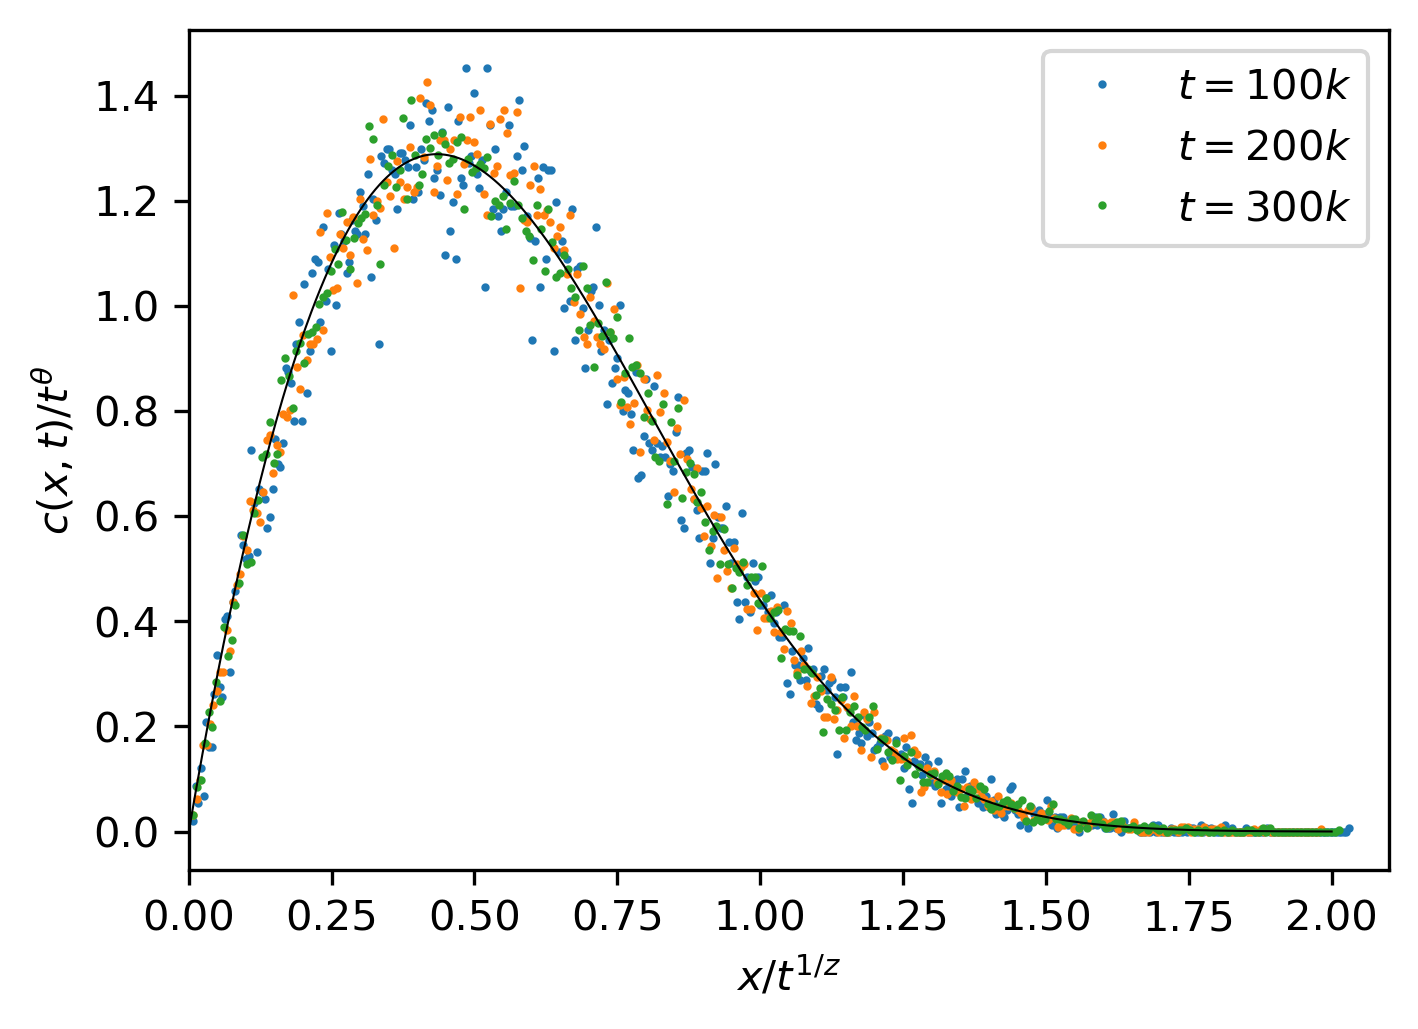

In [20]:
fig, axes = plt.subplots(1,1,figsize = (5,3.5),dpi = 300)

for i in range(3):
    time_t = min_iterationp*(i+1)
    x,y = data_dict[time_t]
    plt.plot(x, y,"o", markersize=1,label=r"$t={}k$".format(str(int(time_t//1000))))

if alphap in [1,2,3]:
    xi_th = np.linspace(0,2,1000)
    xis, phi_th = ana_soln.phi_list(alphap,probp,xi_th)  # from class
    plt.plot(xi_th, phi_th,color='black',linewidth=0.5)

plt.legend(loc=1)
plt.xlabel(r"$x/t^{1/z}$")
plt.ylabel(r"$c(x,t)/t^\theta$")
plt.xlim([0, 2.1])
axes.set_position([0.15, 0.15, 0.8, 0.8])

print(figure_name)
# plt.savefig(figure_name)